# Previsão de Consumo de Energia Elétrica

Instalação da biblioteca

In [2]:
!pip install ipeadatapy 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ipeadatapy from https://files.pythonhosted.org/packages/f6/2c/8b36052b6e4e884cbdab7bb71c99cde4010a3fb1cbf047524deaf60db656/ipeadatapy-0.1.9-py3-none-any.whl.metadata


Importar Biblioteca

In [3]:
import ipeadatapy as ip
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\naime\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
ip.list_series()

## preciso saber o codigo da serie temporal no site do IPEA
## para esta serie o codigo e dado a seguir
ip.describe('ELETRO12_CEESE12')

,Energia elétrica - Consumo - região Sudeste (SE) - quantidade
Name,Energia elétrica - Consumo - região Sudeste (S...
Code,ELETRO12_CEESE12
Big Theme,Macroeconômico
Theme code,2
Source,Eletrobras
Source acronym,Eletrobras
Comment,A energia elétrica no Brasil é dada através de...
Last update,2024-10-18T11:16:00.51-03:00
Frequency,Mensal
Measure,GWh


verificando os dados

In [5]:
cons_sudeste=ip.timeseries('ELETRO12_CEESE12')
cons_sudeste

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (GWh)
DATE,,,,,,
1979-01-01,ELETRO12_CEESE12,1979-01-01T00:00:00-02:00,1,1,1979,5623.0
1979-02-01,ELETRO12_CEESE12,1979-02-01T00:00:00-02:00,1,2,1979,5551.0
1979-03-01,ELETRO12_CEESE12,1979-03-01T00:00:00-03:00,1,3,1979,5725.0
1979-04-01,ELETRO12_CEESE12,1979-04-01T00:00:00-03:00,1,4,1979,5797.0
1979-05-01,ELETRO12_CEESE12,1979-05-01T00:00:00-03:00,1,5,1979,6002.0
...,...,...,...,...,...,...
2024-04-01,ELETRO12_CEESE12,2024-04-01T00:00:00-03:00,1,4,2024,22686.0
2024-05-01,ELETRO12_CEESE12,2024-05-01T00:00:00-03:00,1,5,2024,22864.0
2024-06-01,ELETRO12_CEESE12,2024-06-01T00:00:00-03:00,1,6,2024,21994.0


colhendo os dados da serie do consumo de energia em GWh

In [6]:
consumo = pd.Series(cons_sudeste.iloc[:, 5].values, 
                    index=pd.date_range(start='1979-01-01', periods=len(cons_sudeste), 
                                        freq='ME'))

Plotando o grafico

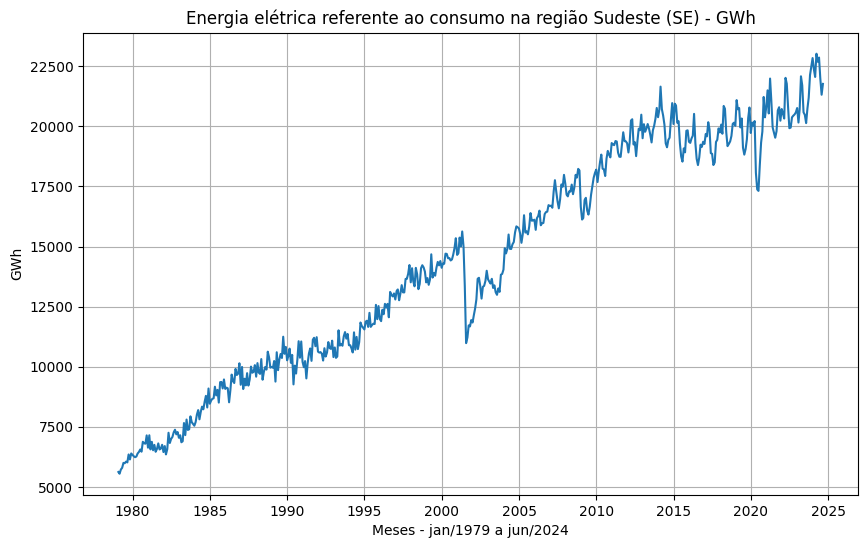

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(consumo)
plt.title("Energia elétrica referente ao consumo na região Sudeste (SE) - GWh")
plt.xlabel("Meses - jan/1979 a jun/2024")
plt.ylabel("GWh")
plt.grid(True)
plt.show()

separando a serie tem dados de treino e teste

In [8]:
# Definir as datas para separar treino e teste
# data de corte escolhida

data_corte="2022-06-01"

# Separar a série em treino e teste usando as datas
energia_treino = consumo['1979-01-01':'2022-06-01']
energia_teste = consumo['2022-07-01':'2024-07-01']
energia_treino
energia_teste

2022-07-31    19949.0
2022-08-31    20376.0
2022-09-30    20443.0
2022-10-31    20496.0
2022-11-30    20581.0
2022-12-31    20763.0
2023-01-31    20159.0
2023-02-28    20704.0
2023-03-31    22083.0
2023-04-30    21706.0
2023-05-31    20584.0
2023-06-30    20481.0
2023-07-31    20136.0
2023-08-31    20745.0
2023-09-30    21190.0
2023-10-31    22135.0
2023-11-30    22489.0
2023-12-31    22841.0
2024-01-31    22368.0
2024-02-29    22056.0
2024-03-31    23022.0
2024-04-30    22686.0
2024-05-31    22864.0
2024-06-30    21994.0
Freq: ME, dtype: float64

Exibir os tamanhos dos períodos de treino e teste

In [9]:
print(f"Período de Treino: {energia_treino.index.min()} até {energia_treino.index.max()} - {len(energia_treino)} registros")
print(f"Período de Teste: {energia_teste.index.min()} até {energia_teste.index.max()} - {len(energia_teste)} registros")


Período de Treino: 1979-01-31 00:00:00 até 2022-05-31 00:00:00 - 521 registros
Período de Teste: 2022-07-31 00:00:00 até 2024-06-30 00:00:00 - 24 registros


Plotar os períodos de treino e teste

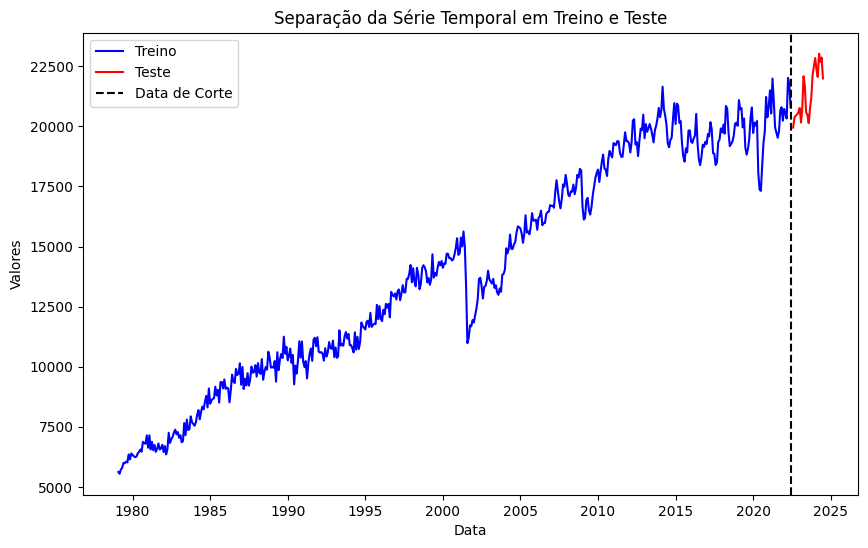

In [10]:
plt.figure(figsize=(10,6))
plt.plot(energia_treino, label='Treino', color='blue')
plt.plot(energia_teste, label='Teste', color='red')
plt.axvline(pd.to_datetime(data_corte), color='black', linestyle='--', label='Data de Corte')
plt.title('Separação da Série Temporal em Treino e Teste')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

### Vamos rodar todos os modelos para a serie de energia do Sudeste

In [11]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Capturar avisos de convergência e tratá-los
warnings.filterwarnings("error", category=ConvergenceWarning)

Carregar os dados de energia e garantir que não há valores ausentes

In [12]:
energia = pd.read_excel("energia.xlsx", usecols=[1]).dropna()

Criar a série temporal a partir de 1979 com frequência mensal

In [14]:
energia.index = pd.date_range(start='1979-01', periods=len(energia), freq='ME')
energia = energia.squeeze()  # Converter para uma Series

Separar a base de dados em treino e teste

In [15]:
benergia = energia[:'2022-06'].ffill()  # Preencher valores nulos com forward fill
reaisenergia = energia['2022-07':'2024-06']  # Teste de 2022-07 até 2024-06

Converter explicitamente para tipo numérico e garantir que são floats

In [16]:
benergia = pd.to_numeric(benergia, errors='coerce').astype(float)

Lista para armazenar os modelos, MAPE e previsões

In [17]:
modelos_energia = []
mapes_energia = []
previsoes_energia = {}

Modelo Naive

In [18]:
naive_forecast = pd.Series([benergia.iloc[-1]] * len(reaisenergia), index=reaisenergia.index)
mape_naive = mape(reaisenergia, naive_forecast) * 100
modelos_energia.append("Naive")
mapes_energia.append(mape_naive)
previsoes_energia["Naive"] = naive_forecast

Modelo Mean (média)

In [19]:
mean_forecast = pd.Series(benergia.mean(), index=reaisenergia.index)
mape_mean = mape(reaisenergia, mean_forecast) * 100
modelos_energia.append("Mean")
mapes_energia.append(mape_mean)
previsoes_energia["Mean"] = mean_forecast

Modelo Drift

In [20]:
n = len(benergia)
drift_slope = (benergia.iloc[-1] - benergia.iloc[0]) / (n - 1)
drift_forecast = benergia.iloc[-1] + drift_slope * np.arange(1, len(reaisenergia) + 1)
drift_forecast = pd.Series(drift_forecast, index=reaisenergia.index)
mape_drift_result = mape(reaisenergia, drift_forecast) * 100
modelos_energia.append("Drift")
mapes_energia.append(mape_drift_result)
previsoes_energia["Drift"] = drift_forecast

Modelo Naive Sazonal

In [21]:
naive_sazonal_forecast = pd.Series([benergia.iloc[-12 + (i % 12)]
                                    for i in range(len(reaisenergia))],
                                   index=reaisenergia.index)
mape_naive_sazonal = mape(reaisenergia, naive_sazonal_forecast) * 100
modelos_energia.append("Naive Sazonal")
mapes_energia.append(mape_naive_sazonal)
previsoes_energia["Naive Sazonal"] = naive_sazonal_forecast

Suavização Exponencial Simples (SES)

In [22]:
ses_model = SimpleExpSmoothing(benergia).fit(optimized=True)
ses_forecast = ses_model.forecast(steps=len(reaisenergia))
mape_ses = mape(reaisenergia, ses_forecast) * 100
modelos_energia.append("SES")
mapes_energia.append(mape_ses)
previsoes_energia["SES"] = ses_forecast

Holt-Winters Aditivo - Ajustar inicialização e Box-Cox para melhorar a convergência

In [23]:
try:
    hw_add_model = ExponentialSmoothing(
        benergia,
        seasonal_periods=12,
        trend='add',
        seasonal='add',
        initialization_method="estimated",  # Método robusto de inicialização
        use_boxcox=True  # Tentar estabilizar a variância com Box-Cox
    ).fit(optimized=True)
    
    hw_add_forecast = hw_add_model.forecast(steps=len(reaisenergia))
    mape_hw_add = mape(reaisenergia, hw_add_forecast) * 100
    modelos_energia.append("Holt-Winters Aditivo")
    mapes_energia.append(mape_hw_add)
    previsoes_energia["Holt-Winters Aditivo"] = hw_add_forecast
except Exception:
    modelos_energia.append("Holt-Winters Aditivo")
    mapes_energia.append(np.nan)

Holt-Winters Multiplicativo - Ajustar inicialização e Box-Cox para melhorar a convergência

In [24]:
try:
    hw_mult_model = ExponentialSmoothing(
        benergia,
        seasonal_periods=12,
        trend='add',
        seasonal='mul',
        initialization_method="estimated",  # Método robusto de inicialização
        use_boxcox=True  # Tentar estabilizar a variância com Box-Cox
    ).fit(optimized=True)
    
    hw_mult_forecast = hw_mult_model.forecast(steps=len(reaisenergia))
    mape_hw_mult = mape(reaisenergia, hw_mult_forecast) * 100
    modelos_energia.append("Holt-Winters Multiplicativo")
    mapes_energia.append(mape_hw_mult)
    previsoes_energia["Holt-Winters Multiplicativo"] = hw_mult_forecast
except Exception:
    modelos_energia.append("Holt-Winters Multiplicativo")
    mapes_energia.append(np.nan)

Comparação dos modelos com base no MAPE

In [25]:
mape_comparison = pd.DataFrame({'Modelo': modelos_energia, 'MAPE': mapes_energia})
mape_comparison = mape_comparison.sort_values(by='MAPE', ascending=True).reset_index(drop=True)
print(mape_comparison)

                        Modelo       MAPE
0  Holt-Winters Multiplicativo   2.816250
1         Holt-Winters Aditivo   3.056556
2                Naive Sazonal   4.014128
3                        Drift   5.070079
4                          SES   5.672273
5                        Naive   6.583573
6                         Mean  34.551019


Gráfico dos MAPE dos modelos

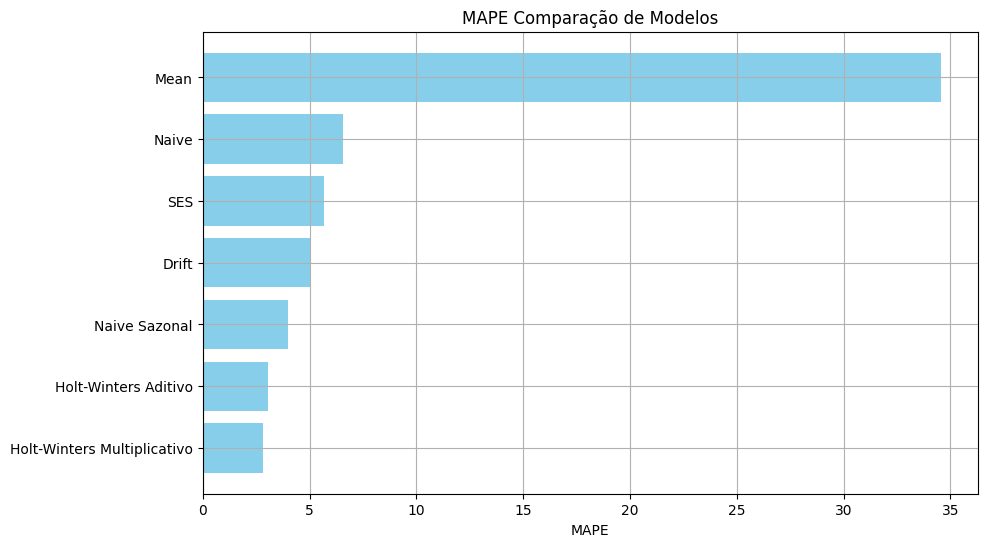

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(mape_comparison['Modelo'], mape_comparison['MAPE'], color='skyblue')
plt.xlabel("MAPE")
plt.title("MAPE Comparação de Modelos")
plt.grid(True)
plt.show()

Selecionar o modelo com o menor MAPE

In [27]:
melhor_modelo = mape_comparison.loc[0, 'Modelo']
melhores_previsoes = previsoes_energia[melhor_modelo]

Criar gráfico comparando os valores reais e previstos do melhor modelo

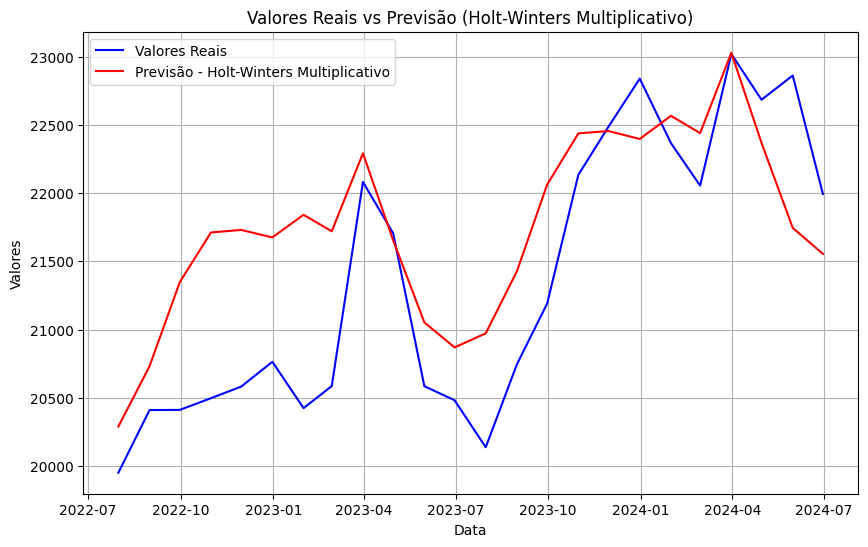

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(reaisenergia.index, reaisenergia, label='Valores Reais', color='blue')
plt.plot(reaisenergia.index, melhores_previsoes, label=f'Previsão - {melhor_modelo}', color='red')
plt.title(f'Valores Reais vs Previsão ({melhor_modelo})')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

### Teste de normalidade e Ljung-Box para os resíduos do melhor modelo

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

residuos = reaisenergia - melhores_previsoes

Teste de normalidade Shapiro-Wilk

In [30]:
stat, p_value_shapiro = shapiro(residuos)
print(f"Teste de Normalidade Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p_value_shapiro:.4f}")
if p_value_shapiro > 0.05:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0).")

Teste de Normalidade Shapiro-Wilk: Estatística=0.9710, p-valor=0.6907
Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).


Teste de Ljung-Box para autocorrelação dos resíduos

In [31]:
lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(f"Teste Ljung-Box:\n{lb_test}")

Teste Ljung-Box:
      lb_stat  lb_pvalue
10  19.611825   0.033145


Interpretação do teste de Ljung-Box

In [32]:
p_value_ljungbox = lb_test['lb_pvalue'].values[0]
if p_value_ljungbox > 0.05:
    print("Não há evidências de autocorrelação significativa nos resíduos (não rejeitamos H0).")
else:
    print("Há evidências de autocorrelação nos resíduos (rejeitamos H0).")

Há evidências de autocorrelação nos resíduos (rejeitamos H0).
